# Análise de Vendas — Loja Online de Eletrônicos

## Contexto
Este notebook apresenta uma análise exploratória dos dados de vendas de uma loja online fictícia de eletrônicos.
O objetivo é avaliar o desempenho comercial, entender o comportamento dos clientes, analisar a eficiência operacional
e identificar problemas de qualidade nos dados.

## Ferramentas
- Numpy
- Pandas
- Matplotlib




In [ ]:
# INSTALAÇÃO DOS PACOTES
!pip install pandas numpy matplotlib

In [1]:
# IMPORTAÇÕES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CARREGAMENTO DOS DADOS
df = pd.read_csv(r"C:\Users\samue\Documents\projeto-analise-vendas\data\dados.csv")
df.head()


,pedido_id,data_pedido,cliente_id,idade_cliente,genero,produto,categoria,preco_unitario,quantidade,forma_pagamento,valor_total,cidade,estado,status_pedido
0,1001,2024-01-05,C001,29,M,Smartphone X,Smartphones,2500,1,Cartao,2500.0,São Paulo,SP,Entregue
1,1002,2024-01-07,C002,34,F,Notebook Pro,Notebooks,4500,1,Boleto,4500.0,Rio de Janeiro,RJ,Entregue
2,1003,2024-01-08,C003,22,M,Fone Bluetooth,Acessorios,300,2,Pix,600.0,Belo Horizonte,MG,Cancelado
3,1004,2024-01-10,C004,NaN,F,Tablet Plus,Tablets,1800,1,Cartao,1800.0,Curitiba,PR,Entregue
4,1005,2024-01-11,C005,41,M,Smartphone X,Smartphones,2500,2,Cartao,5000.0,Porto Alegre,RS,Entregue


In [3]:
# VISÃO GERAL DOS DADOS
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pedido_id        15 non-null     int64  
 1   data_pedido      15 non-null     object 
 2   cliente_id       15 non-null     object 
 3   idade_cliente    14 non-null     object 
 4   genero           15 non-null     object 
 5   produto          15 non-null     object 
 6   categoria        15 non-null     object 
 7   preco_unitario   15 non-null     int64  
 8   quantidade       15 non-null     int64  
 9   forma_pagamento  14 non-null     object 
 10  valor_total      14 non-null     float64
 11  cidade           14 non-null     object 
 12  estado           15 non-null     object 
 13  status_pedido    15 non-null     object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.8+ KB


## 1. Inspeção inicial dos dados

Nesta etapa, buscamos entender a estrutura geral do dataset, identificar tipos de dados,
campos ausentes e possíveis inconsistências iniciais.


In [4]:
# VALORES AUSENTES
df.isna().sum()


pedido_id          0
data_pedido        0
cliente_id         0
idade_cliente      1
genero             0
produto            0
categoria          0
preco_unitario     0
quantidade         0
forma_pagamento    1
valor_total        1
cidade             1
estado             0
status_pedido      0
dtype: int64

## 2. Qualidade e limpeza dos dados

A seguir, são realizados tratamentos para corrigir valores ausentes, inconsistências
e violações de regras de negócio, garantindo maior confiabilidade para a análise.


In [5]:
# TRATAMENTO DE IDADE
df["idade_cliente"] = pd.to_numeric(df["idade_cliente"], errors="coerce")
df["idade_cliente"].describe()


count    13.000000
mean     34.923077
std      13.041354
min      19.000000
25%      27.000000
50%      31.000000
75%      41.000000
max      65.000000
Name: idade_cliente, dtype: float64

In [6]:
# PADRONIZAÇÃO DE CIDADE
df["cidade"] = df["cidade"].str.strip().str.title()


## 3. Verificação de regras de negócio

Nesta etapa, verificamos se os valores monetários e quantidades seguem
as regras esperadas para pedidos válidos.


In [7]:
# RECÁLCULO DO VALOR TOTAL
df["valor_calculado"] = df["preco_unitario"] * df["quantidade"]
df[["valor_total", "valor_calculado"]]



,valor_total,valor_calculado
0,2500.0,2500
1,4500.0,4500
2,600.0,600
3,1800.0,1800
4,5000.0,5000
5,300.0,300
6,4500.0,4500
7,1200.0,1200
8,2500.0,2500
9,900.0,900


In [8]:
# DATASET FINAL

df_tratado = df.copy()
df_tratado.head()


,pedido_id,data_pedido,cliente_id,idade_cliente,genero,produto,categoria,preco_unitario,quantidade,forma_pagamento,valor_total,cidade,estado,status_pedido,valor_calculado
0,1001,2024-01-05,C001,29.0,M,Smartphone X,Smartphones,2500,1,Cartao,2500.0,São Paulo,SP,Entregue,2500
1,1002,2024-01-07,C002,34.0,F,Notebook Pro,Notebooks,4500,1,Boleto,4500.0,Rio De Janeiro,RJ,Entregue,4500
2,1003,2024-01-08,C003,22.0,M,Fone Bluetooth,Acessorios,300,2,Pix,600.0,Belo Horizonte,MG,Cancelado,600
3,1004,2024-01-10,C004,NaN,F,Tablet Plus,Tablets,1800,1,Cartao,1800.0,Curitiba,PR,Entregue,1800
4,1005,2024-01-11,C005,41.0,M,Smartphone X,Smartphones,2500,2,Cartao,5000.0,Porto Alegre,RS,Entregue,5000


# Objetivos da Análise

Com os dados tratados, a análise a seguir busca:
- Avaliar o desempenho de vendas
- Identificar produtos e categorias mais relevantes
- Analisar o perfil dos clientes
- Avaliar eficiência operacional
- Gerar insights e recomendações


In [9]:
# ANÁLISE DE RECEITA
df_tratado.groupby("categoria")["valor_total"].sum().sort_values(ascending=False)


categoria
Smartphones    10000.0
Notebooks       9000.0
Tablets         3600.0
Wearables       2400.0
Acessorios      2100.0
Name: valor_total, dtype: float64

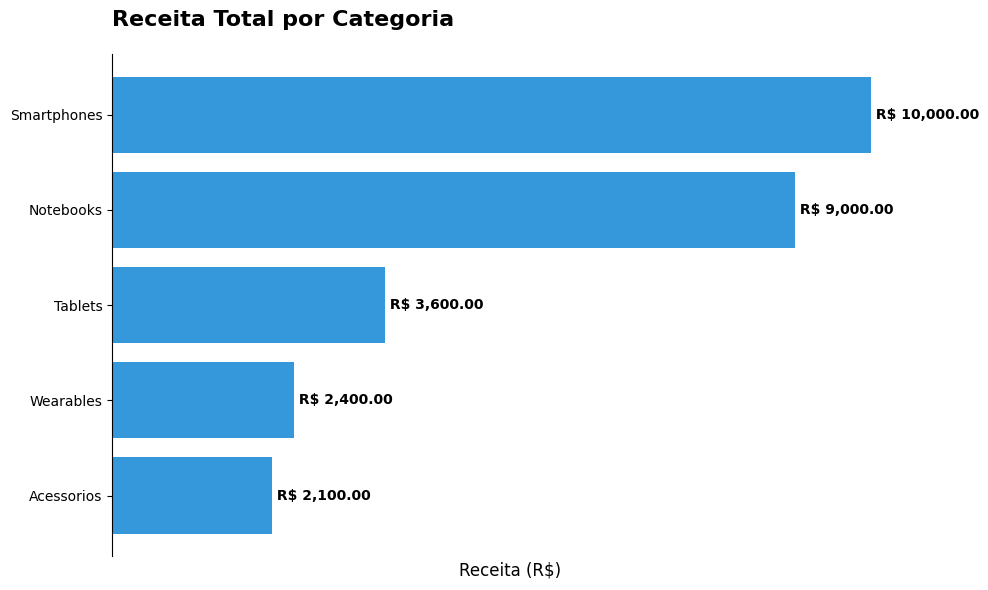

In [11]:
# GRÁFICO DE RECEITA POR CATEGORIA

# 1. Preparação dos dados (Ordenação é crucial para análise)
receita_por_cat = df_tratado.groupby("categoria")["valor_total"].sum().sort_values(ascending=True)

# 2. Criando a figura
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Gráfico de barras HORIZONTAIS (barh)
# Barras horizontais são melhores para ler nomes de categorias
barras = ax.barh(receita_por_cat.index, receita_por_cat.values, color='#3498db')

# 4. Adicionando rótulos de dados (Labels)
# Isso elimina a necessidade do leitor "chutar" o valor no eixo X
for barra in barras:
    largura = barra.get_width()
    ax.text(largura, barra.get_y() + barra.get_height()/2,
            f' R$ {largura:,.2f}', 
            va='center', ha='left', fontsize=10, fontweight='bold')

# 5. Melhorando títulos e eixos
ax.set_title("Receita Total por Categoria", fontsize=16, fontweight='bold', loc='left', pad=20)
ax.set_xlabel("Receita (R$)", fontsize=12)

# 6. Limpeza Visual (Data-Ink Ratio)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([]) # Remove os números do eixo X, já que temos os rótulos nas barras



plt.tight_layout()

# 1. Salvar primeiro
plt.savefig("grafico_receita.png", dpi=300, bbox_inches="tight")

# 2. Mostrar depois (opcional)
plt.show()

## 4. Análise de Clientes

Nesta seção, analisamos o perfil dos clientes e seus padrões de consumo,
com foco em idade, gênero e valor médio gasto.


In [12]:
# DISTRIBUIÇÃO DE IDADE
df_tratado["idade_cliente"].describe()


count    13.000000
mean     34.923077
std      13.041354
min      19.000000
25%      27.000000
50%      31.000000
75%      41.000000
max      65.000000
Name: idade_cliente, dtype: float64

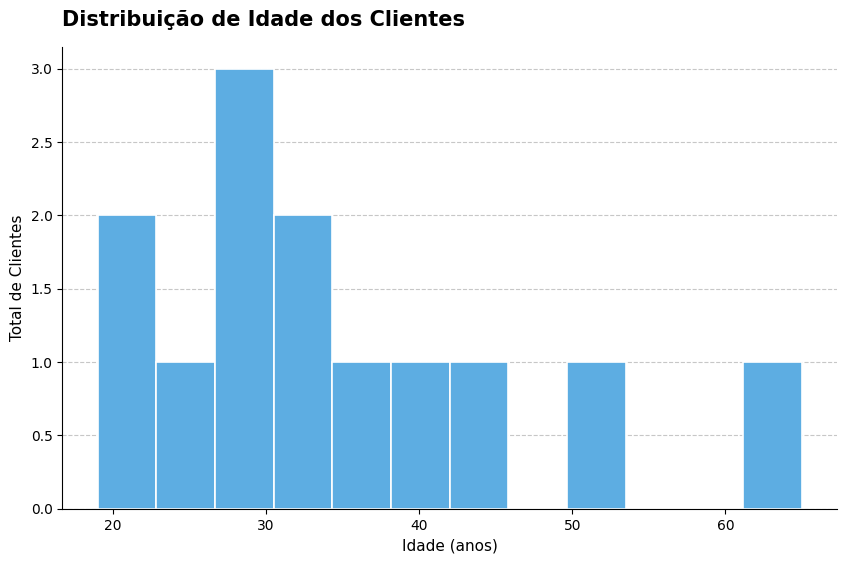

In [13]:
# HISTOGRAMA DE IDADE

# Criando a figura e o eixo (Abordagem orientada a objetos)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o histograma
# 'edgecolor' ajuda a separar as barras visualmente
n, bins, patches = ax.hist(df_tratado["idade_cliente"].dropna(), 
                           bins=12, 
                           color="#5DADE2", 
                           edgecolor="white", 
                           linewidth=1.2)

# Melhorando a estética e informações
ax.set_title("Distribuição de Idade dos Clientes", fontsize=15, fontweight='bold', loc='left', pad=15)
ax.set_xlabel("Idade (anos)", fontsize=11)
ax.set_ylabel("Total de Clientes", fontsize=11)

# Adicionando uma grade apenas no eixo Y para facilitar a leitura de grandeza
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True) # Garante que a grade fique atrás das barras

# Removendo as bordas de cima e da direita (spines) para um visual moderno
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("distribuiçao_de_idade.png", dpi=300, bbox_inches="tight")
plt.show()

Observa-se que a maior concentração de clientes está nas faixas etárias intermediárias,
com menor participação de clientes muito jovens ou muito idosos.


In [14]:
# TICKET MÉDIO POR CLIENTE
ticket_medio_cliente = (
    df_tratado.groupby("cliente_id")["valor_total"]
    .mean()
    .sort_values(ascending=False)
)

ticket_medio_cliente.head()


cliente_id
C005    5000.0
C002    4500.0
C007    4500.0
C001    2500.0
C009    2500.0
Name: valor_total, dtype: float64

In [15]:
# TICKET MÉDIO GERAL
df_tratado["valor_total"].mean()


np.float64(1935.7142857142858)

In [16]:
# TICKET MÉDIO POR FAIXA ETÁRIA
bins = [0, 24, 34, 44, 54, 100]
labels = ["Até 24", "25-34", "35-44", "45-54", "55+"]

df_tratado["faixa_etaria"] = pd.cut(
    df_tratado["idade_cliente"],
    bins=bins,
    labels=labels
)

df_tratado.groupby("faixa_etaria")["valor_total"].mean()


C:\Users\samue\AppData\Local\Temp\ipykernel_19324\1000598610.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tratado.groupby("faixa_etaria")["valor_total"].mean()


faixa_etaria
Até 24     700.0
25-34     1880.0
35-44     2500.0
45-54     4500.0
55+       2500.0
Name: valor_total, dtype: float64

C:\Users\samue\AppData\Local\Temp\ipykernel_19324\4025761862.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_tratado.groupby("faixa_etaria")["valor_total"].mean()


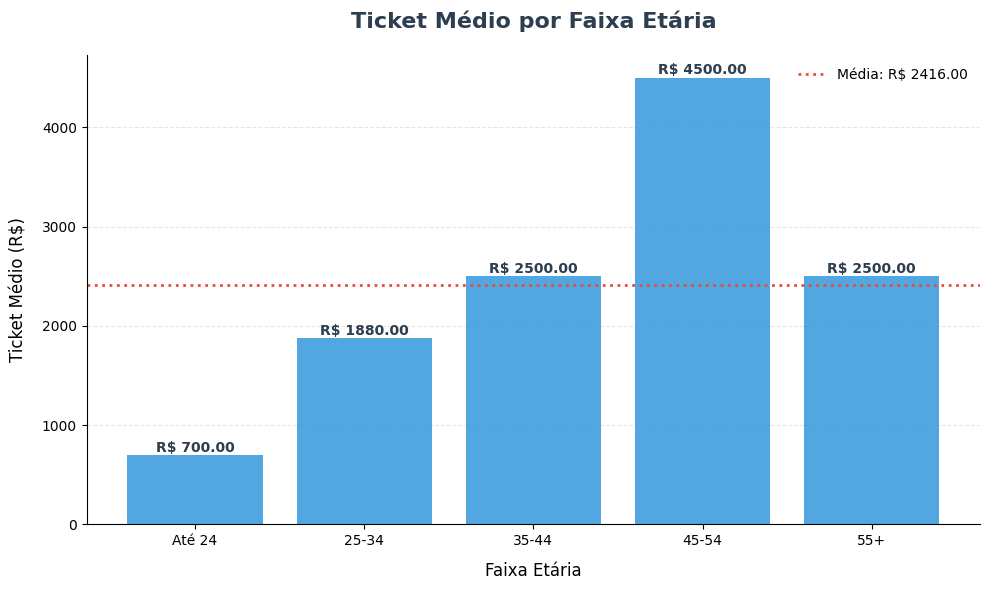

In [17]:
# GRÁFICO: TICKET MÉDIO POR FAIXA ETÁRIA

# 1. Preparação dos dados
df_plot = df_tratado.groupby("faixa_etaria")["valor_total"].mean()
categorias = df_plot.index
valores = df_plot.values

# 2. Configuração da figura
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Criação das barras
cor_principal = '#3498db'
bars = ax.bar(categorias, valores, color=cor_principal, alpha=0.85)

# 4. Adicionar rótulos de dados (Data Labels)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'R$ {height:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2c3e50')

# 5. Personalização de Títulos e Eixos
ax.set_title('Ticket Médio por Faixa Etária', fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
ax.set_xlabel('Faixa Etária', fontsize=12, labelpad=10)
ax.set_ylabel('Ticket Médio (R$)', fontsize=12, labelpad=10)

# 6. Refinamento Visual
ax.yaxis.grid(True, linestyle='--', alpha=0.3) # Grade sutil
ax.set_axisbelow(True)                         # Grade atrás das barras
ax.spines['top'].set_visible(False)            # Remove borda superior
ax.spines['right'].set_visible(False)          # Remove borda direita

# 7. Linha de Média Geral
media = valores.mean()
ax.axhline(media, color='#e74c3c', linestyle=':', linewidth=2, label=f'Média: R$ {media:.2f}')
ax.legend(frameon=False)

# 8. Exibição
plt.tight_layout()

plt.savefig("ticketmedio.png", dpi=300, bbox_inches="tight")

plt.show()


In [18]:
# ANÁLISE POR GÊNERO
df_tratado.groupby("genero")["valor_total"].mean()


genero
F    1350.000000
M    2716.666667
Name: valor_total, dtype: float64

C:\Users\samue\AppData\Local\Temp\ipykernel_19324\1073125232.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_tratado.groupby("faixa_etaria")["valor_total"].count()


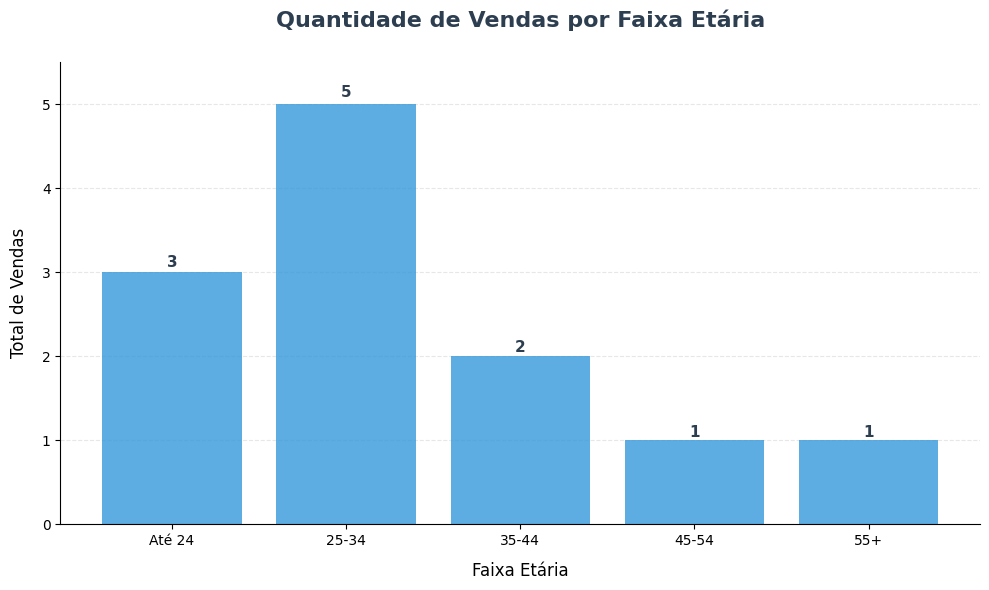

In [19]:
# GRÁFICO: TICKET MÉDIO POR GÊNERO

# 1. Preparação dos dados (Quantidade de Vendas)
# Substitua pelo seu agrupamento real: df_tratado.groupby("faixa_etaria").size() ou similar
df_plot = df_tratado.groupby("faixa_etaria")["valor_total"].count() 
categorias = df_plot.index
valores = df_plot.values

# 2. Configuração da figura
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Criação das barras (Verde para representar volume/vendas)
cor_vendas = '#3498db'
bars = ax.bar(categorias, valores, color=cor_vendas, alpha=0.8)

# 4. Adicionar rótulos de dados (Data Labels)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='#2c3e50')

# 5. Personalização de Títulos e Eixos
ax.set_title('Quantidade de Vendas por Faixa Etária', fontsize=16, fontweight='bold', pad=25, color='#2c3e50')
ax.set_xlabel('Faixa Etária', fontsize=12, labelpad=10)
ax.set_ylabel('Total de Vendas', fontsize=12, labelpad=10)

# 6. Refinamento Visual
ax.yaxis.grid(True, linestyle='--', alpha=0.3) # Grade sutil
ax.set_axisbelow(True)                         # Grade atrás das barras
ax.spines['top'].set_visible(False)            # Remove borda superior
ax.spines['right'].set_visible(False)          # Remove borda direita

# 7. Ajuste de limite para não cortar os rótulos
ax.set_ylim(0, valores.max() * 1.1)

# 8. Exibição
plt.tight_layout()
plt.show()


### Principais insights sobre clientes

- O ticket médio varia de acordo com a faixa etária, indicando padrões distintos de consumo.
- Clientes em faixas etárias intermediárias concentram maior volume de compras.
- Diferenças de ticket médio por gênero podem indicar oportunidades de segmentação.


## 5. Eficiência Operacional

Nesta seção, analisamos o status dos pedidos para avaliar a eficiência
da operação, identificando taxas de cancelamento, devolução e entrega.


In [20]:
# DISTRIBUIÇÃO DOS STATUS DOS PEDIDOS
status_dist = df_tratado["status_pedido"].value_counts()
status_dist


status_pedido
Entregue     12
Cancelado     2
Devolvido     1
Name: count, dtype: int64

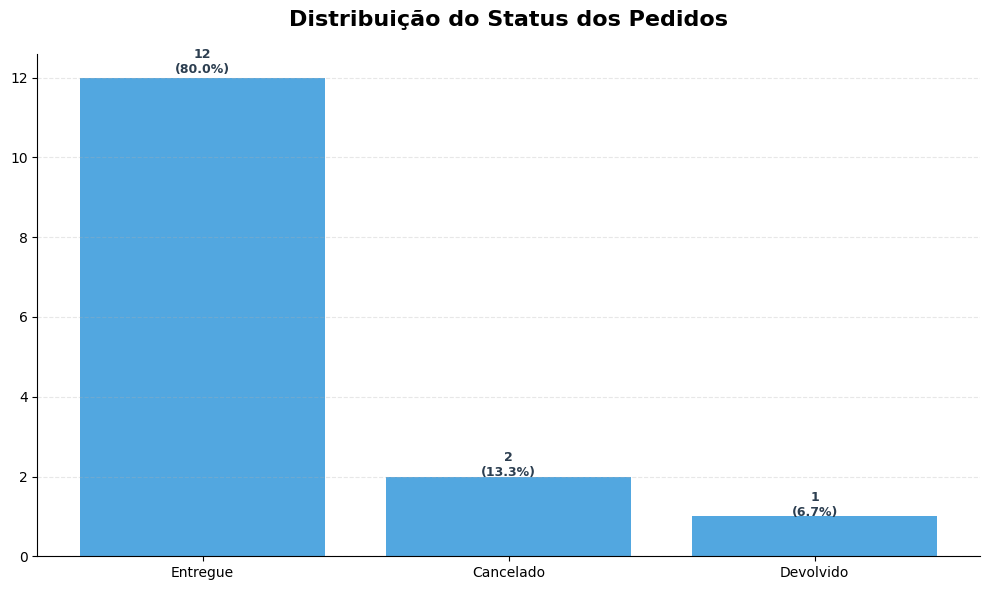

In [22]:
#GRÁFICO: STATUS DOS PEDIDOS

status_dist = status_dist.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(status_dist.index, status_dist.values, color='#3498db', alpha=0.85)

total = status_dist.values.sum()
for b in bars:
    h = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, h + (h*0.01), 
            f'{int(h)}\n({(h/total)*100:.1f}%)', ha='center', fontweight='bold', color='#2c3e50', fontsize=9)

ax.set_title('Distribuição do Status dos Pedidos', fontsize=16, fontweight='bold', pad=20)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("Distribuicaostatuspedidos.png", dpi=300, bbox_inches="tight")
plt.show()


In [44]:
# TAXA DE CANCELAMENTO
total_pedidos = len(df_tratado)
taxa_cancelamento = (
    status_dist.get("Cancelado", 0) / total_pedidos
) * 100

taxa_cancelamento


np.float64(13.333333333333334)

In [45]:
# TAXA DE DEVOLUÇÃO
taxa_devolucao = (
    status_dist.get("Devolvido", 0) / total_pedidos
) * 100

taxa_devolucao


np.float64(6.666666666666667)

In [46]:
# STATUS POR CATEGORIA
status_categoria = (
    df_tratado
    .groupby(["categoria", "status_pedido"])
    .size()
    .unstack(fill_value=0)
)

status_categoria


status_pedido,Cancelado,Devolvido,Entregue
categoria,,,
Acessorios,1,0,3
Notebooks,0,0,3
Smartphones,0,1,3
Tablets,1,0,1
Wearables,0,0,2


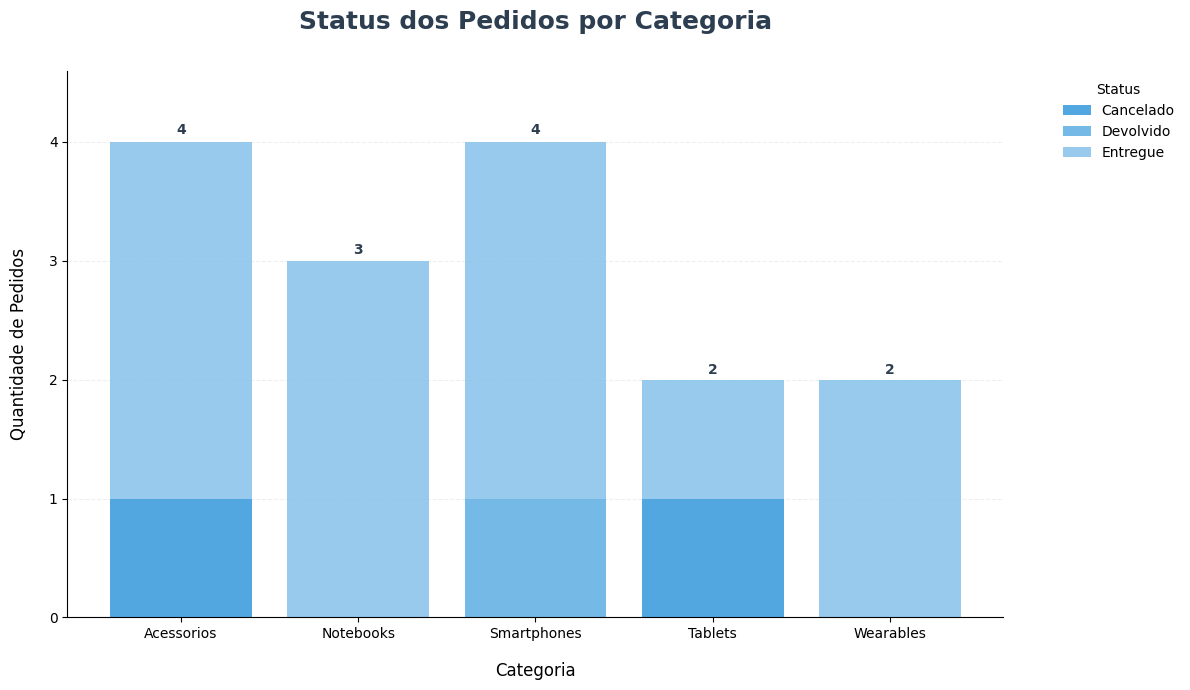

In [47]:
# STATUS POR CATEGORIA

# 1. Preparação dos dados
# Certifique-se de que status_categoria seja um DataFrame onde:
# Index = Categorias, Colunas = Status
categorias = status_categoria.index
status_cols = status_categoria.columns

# 2. Definição de Cores (Tons de Azul baseados em #3498db)
# Criamos uma lista de tons para diferenciar as fatias da barra
cores = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8']

# 3. Configuração da figura
fig, ax = plt.subplots(figsize=(12, 7))

# 4. Construção das barras empilhadas
bottom = np.zeros(len(status_categoria))
for i, col in enumerate(status_cols):
    ax.bar(categorias, status_categoria[col], bottom=bottom, 
           label=col, color=cores[i % len(cores)], alpha=0.85)
    bottom += status_categoria[col]

# 5. Adicionar rótulos de totais no topo de cada barra
for i, total in enumerate(bottom):
    ax.text(i, total + (total * 0.01), f'{int(total)}', 
            ha='center', va='bottom', fontweight='bold', color='#2c3e50')

# 6. Personalização de Títulos e Eixos
ax.set_title('Status dos Pedidos por Categoria', fontsize=18, fontweight='bold', pad=30, color='#2c3e50')
ax.set_xlabel('Categoria', fontsize=12, labelpad=15)
ax.set_ylabel('Quantidade de Pedidos', fontsize=12, labelpad=15)

# 7. Legenda e Refinamento
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.yaxis.grid(True, linestyle='--', alpha=0.2)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 8. Ajuste de limite e layout
ax.set_ylim(0, max(bottom) * 1.15)
plt.tight_layout()
plt.show()


In [48]:
# CANCELAMENTOS POR FORMA DE PAGAMENTO
cancelamento_pagamento = (
    df_tratado[df_tratado["status_pedido"] == "Cancelado"]
    .groupby("forma_pagamento")
    .size()
)

cancelamento_pagamento


forma_pagamento
Boleto    1
Pix       1
dtype: int64

A análise dos status dos pedidos indica que a maioria das compras é entregue com sucesso.
No entanto, observa-se a ocorrência de cancelamentos e devoluções concentrados em
determinadas categorias e formas de pagamento, sugerindo possíveis gargalos
operacionais ou problemas na experiência do cliente.


### Principais insights operacionais

- A taxa de cancelamento representa uma parcela relevante dos pedidos e merece atenção.
- Algumas categorias apresentam maior incidência de cancelamentos e devoluções.
- A relação entre forma de pagamento e cancelamento pode indicar falhas no processo de cobrança.


## 6. Formas de Pagamento

Nesta seção, analisamos as formas de pagamento utilizadas pelos clientes,
avaliando sua distribuição e relação com o valor dos pedidos e o status das compras.


In [49]:
# DISTRIBUIÇÃO DAS FORMAS DE PAGAMENTO
pagamento_dist = df_tratado["forma_pagamento"].value_counts()
pagamento_dist


forma_pagamento
Cartao    6
Pix       6
Boleto    2
Name: count, dtype: int64

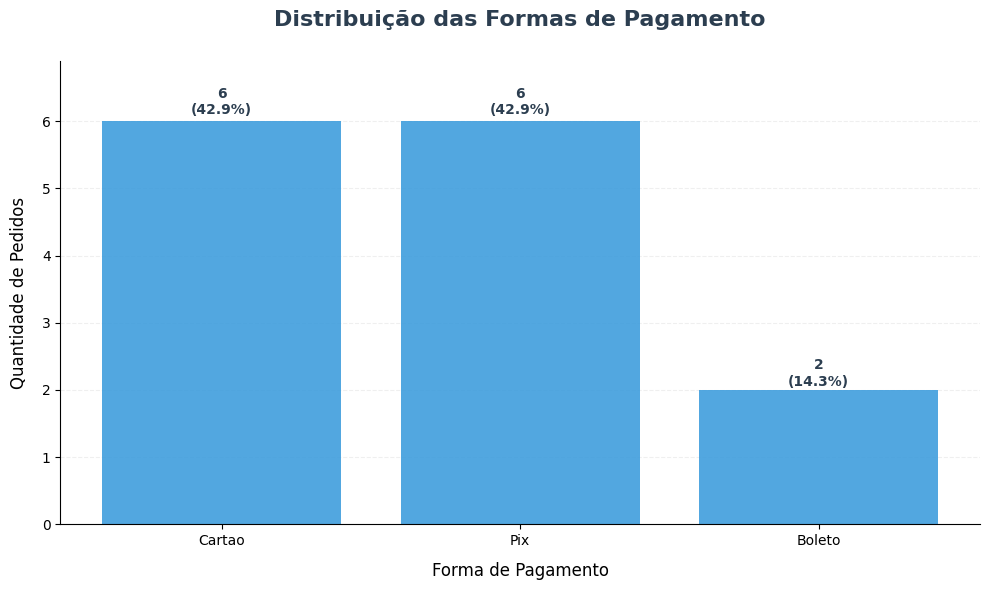

In [50]:
# GRÁFICO: FORMAS DE PAGAMENTO

# 1. Preparação dos dados
pagamento_dist = pagamento_dist.sort_values(ascending=False)
categorias = pagamento_dist.index
valores = pagamento_dist.values

# 2. Configuração da figura
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Criação das barras (Cor padrão #3498db)
cor_padrao = '#3498db'
bars = ax.bar(categorias, valores, color=cor_padrao, alpha=0.85)

# 4. Adicionar rótulos de dados (Valor Absoluto + Porcentagem)
total = valores.sum()
for bar in bars:
    height = bar.get_height()
    pct = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            f'{int(height)}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2c3e50')

# 5. Personalização de Títulos e Eixos
ax.set_title('Distribuição das Formas de Pagamento', fontsize=16, fontweight='bold', pad=25, color='#2c3e50')
ax.set_xlabel('Forma de Pagamento', fontsize=12, labelpad=10)
ax.set_ylabel('Quantidade de Pedidos', fontsize=12, labelpad=10)

# 6. Refinamento Visual
ax.yaxis.grid(True, linestyle='--', alpha=0.2) # Grade sutil
ax.set_axisbelow(True)                         # Grade atrás das barras
ax.spines['top'].set_visible(False)            # Remove borda superior
ax.spines['right'].set_visible(False)          # Remove borda direita

# 7. Ajuste de limite para não cortar os rótulos
ax.set_ylim(0, valores.max() * 1.15)

# 8. Exibição
plt.tight_layout()
plt.show()


In [23]:
# VALOR MÉDIO POR FORMA DE PAGAMENTO
df_tratado.groupby("forma_pagamento")["valor_total"].mean()


forma_pagamento
Boleto    3150.0
Cartao    2600.0
Pix        550.0
Name: valor_total, dtype: float64

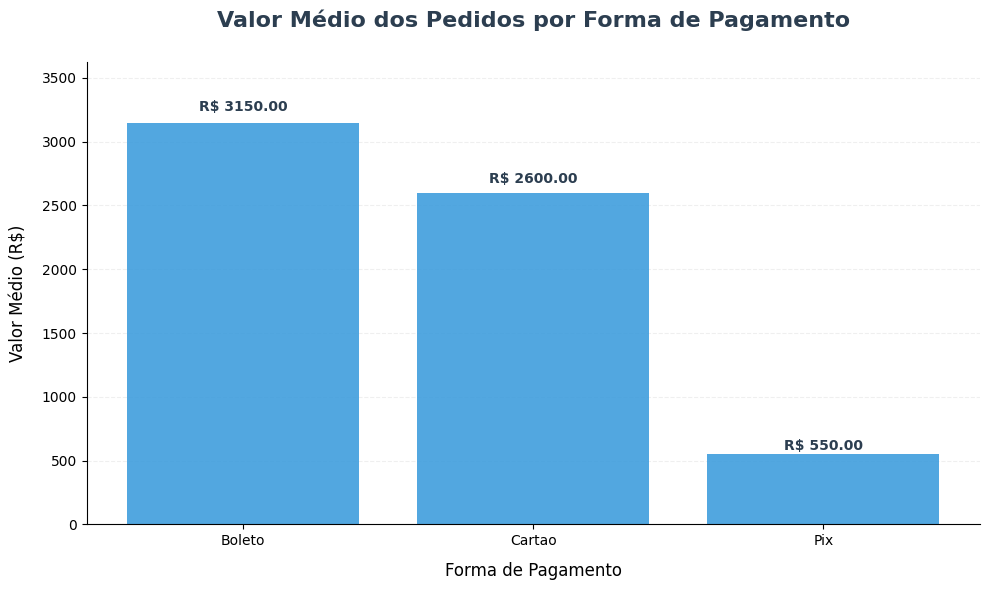

In [24]:
# GRÁFICO: VALOR MÉDIO POR FORMA DE PAGAMENTO

# 1. Preparação dos dados
df_plot = df_tratado.groupby("forma_pagamento")["valor_total"].mean().sort_values(ascending=False)
categorias = df_plot.index
valores = df_plot.values

# 2. Configuração da figura
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Criação das barras (Cor padrão #3498db)
cor_padrao = '#3498db'
bars = ax.bar(categorias, valores, color=cor_padrao, alpha=0.85)

# 4. Adicionar rótulos de dados (Formatados como Moeda R$)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.02),
            f'R$ {height:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2c3e50')

# 5. Personalização de Títulos e Eixos
ax.set_title('Valor Médio dos Pedidos por Forma de Pagamento', fontsize=16, fontweight='bold', pad=25, color='#2c3e50')
ax.set_xlabel('Forma de Pagamento', fontsize=12, labelpad=10)
ax.set_ylabel('Valor Médio (R$)', fontsize=12, labelpad=10)

# 6. Refinamento Visual
ax.yaxis.grid(True, linestyle='--', alpha=0.2) # Grade sutil
ax.set_axisbelow(True)                         # Grade atrás das barras
ax.spines['top'].set_visible(False)            # Remove borda superior
ax.spines['right'].set_visible(False)          # Remove borda direita

# 7. Ajuste de limite para não cortar os rótulos
ax.set_ylim(0, valores.max() * 1.15)

# 8. Exibição
plt.tight_layout()
plt.savefig("Valormediodepedidos.png", dpi=300, bbox_inches="tight")
plt.show()


In [54]:
# STATUS DO PEDIDO POR FORMA DE PAGAMENTO
status_pagamento = (
    df_tratado
    .groupby(["forma_pagamento", "status_pedido"])
    .size()
    .unstack(fill_value=0)
)

status_pagamento


status_pedido,Cancelado,Devolvido,Entregue
forma_pagamento,,,
Boleto,1,0,1
Cartao,0,1,5
Pix,1,0,5


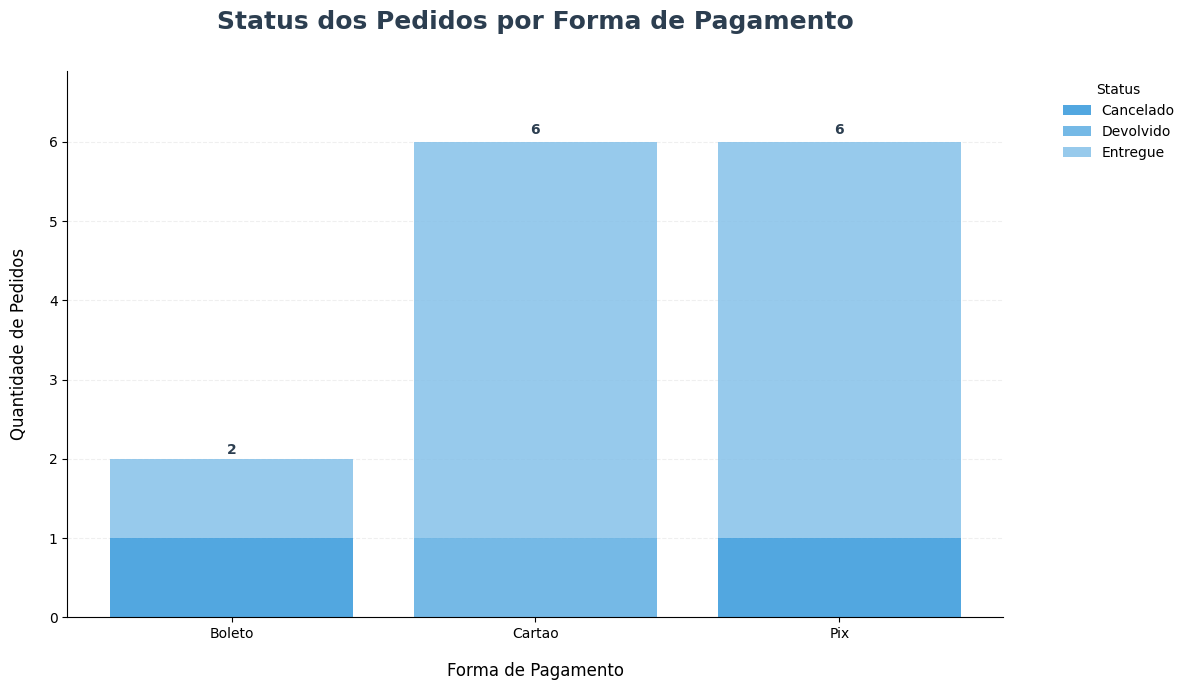

In [55]:
# GRÁFICO: STATUS POR FORMA DE PAGAMENTO

# 1. Preparação dos dados
categorias = status_pagamento.index
status_cols = status_pagamento.columns

# 2. Definição de Cores (Tons de Azul baseados em #3498db)
cores = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8']

# 3. Configuração da figura
fig, ax = plt.subplots(figsize=(12, 7))

# 4. Construção das barras empilhadas
bottom = np.zeros(len(status_pagamento))
for i, col in enumerate(status_cols):
    ax.bar(categorias, status_pagamento[col], bottom=bottom, 
           label=col, color=cores[i % len(cores)], alpha=0.85)
    bottom += status_pagamento[col]

# 5. Adicionar rótulos de totais no topo de cada barra
for i, total in enumerate(bottom):
    ax.text(i, total + (total * 0.01), f'{int(total)}', 
            ha='center', va='bottom', fontweight='bold', color='#2c3e50')

# 6. Personalização de Títulos e Eixos
ax.set_title('Status dos Pedidos por Forma de Pagamento', fontsize=18, fontweight='bold', pad=30, color='#2c3e50')
ax.set_xlabel('Forma de Pagamento', fontsize=12, labelpad=15)
ax.set_ylabel('Quantidade de Pedidos', fontsize=12, labelpad=15)

# 7. Legenda e Refinamento
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.yaxis.grid(True, linestyle='--', alpha=0.2)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 8. Ajuste de limite e layout
ax.set_ylim(0, max(bottom) * 1.15)
plt.tight_layout()

plt.show()


### Principais insights sobre formas de pagamento

- Algumas formas de pagamento são mais frequentes, indicando preferência dos clientes.
- O valor médio dos pedidos varia conforme a forma de pagamento utilizada.
- Certas formas de pagamento apresentam maior incidência de cancelamentos ou devoluções,
o que pode indicar falhas operacionais ou restrições percebidas pelos clientes.


## 7. Consolidação de Insights

Nesta seção, são apresentados os principais achados da análise,
integrando os resultados obtidos nas etapas anteriores.


### Insights Comerciais

- A receita da loja é concentrada em poucas categorias, com destaque para smartphones e notebooks.
- Produtos de maior valor unitário têm menor volume de vendas, mas impacto significativo na receita total.
- Categorias de acessórios apresentam alto volume de vendas, porém menor contribuição para a receita.


### Insights sobre Clientes

- A maior parte dos clientes está concentrada em faixas etárias intermediárias.
- Clientes dessas faixas apresentam ticket médio superior à média geral.
- Diferenças de ticket médio por gênero indicam possíveis oportunidades de segmentação.


### Insights Operacionais

- A maioria dos pedidos é entregue com sucesso, indicando operação funcional.
- Cancelamentos e devoluções estão concentrados em categorias específicas.
- A ocorrência de pedidos cancelados sugere oportunidades de melhoria no processo de compra.


### Insights sobre Formas de Pagamento

- Algumas formas de pagamento são claramente preferidas pelos clientes.
- Pedidos de maior valor tendem a utilizar formas de pagamento específicas.
- Determinadas formas de pagamento apresentam maior associação com cancelamentos.


## 8. Recomendações

Com base nos insights obtidos, são sugeridas as seguintes ações para melhoria
do desempenho comercial e operacional da loja.


### Recomendações Estratégicas

- Priorizar campanhas de marketing para categorias de maior receita.
- Criar ações promocionais para acessórios, incentivando compras combinadas.
- Investigar causas de cancelamento em categorias com maior incidência.
- Revisar o fluxo de pagamento para métodos associados a cancelamentos.
- Explorar segmentação por faixa etária para personalização de ofertas.


## 9. Limitações da Análise

- O dataset é fictício e possui volume reduzido.
- Algumas variáveis importantes não estão disponíveis, como renda e frequência de compra.
- A análise considera apenas um período limitado de vendas.


## Conclusão

A análise permitiu compreender o desempenho de vendas da loja, o perfil dos clientes
e a eficiência operacional dos pedidos. Apesar das limitações, os resultados oferecem
insights relevantes e apontam oportunidades de melhoria, demonstrando o potencial
do uso de dados para apoio à tomada de decisão.
